In [1]:
from utils.analysis.tools import simDir
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pylab as pl
import matplotlib

In [2]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/08_FreezeRNA/Shorter/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.52_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_6000.0_kd_1.0")

In [3]:
sim.run()
sim.condensate()
sim.rna()

In [4]:
def frameFigure(sim,
                i:int,
                t:int,
                cmap=None):
    cmap = cmap or sim.movie_params['color_map'][i]
    fig,ax = plt.subplots()
    cs = ax.tricontourf(sim.geometry.mesh.x,
                        sim.geometry.mesh.y,
                        sim.concentration_profile[i][t],
                        levels = np.linspace(int(np.floor(sim.plotting_range[i][0]*100))/100,
                                                int(np.ceil(sim.plotting_range[i][1]*100))/100,
                                                256),
                        cmap=cmap)
    ax.autoscale_view()
    ax.xaxis.set_tick_params(labelbottom=False, bottom=False)
    ax.yaxis.set_tick_params(labelleft=False, left=False)
    ax.set_aspect('equal', 'box')
    plt.setp(ax.spines.values(), visible=False)
    return fig,ax

In [5]:
ncolors = 256
color_array = plt.get_cmap('Reds')(range(ncolors))

# change alpha values
color_array[:, -1] = np.linspace(0.0, 1.0, ncolors)

# create a new colormap with the modified color array
map_object = LinearSegmentedColormap.from_list(name='Reds_alpha', colors=color_array)

# register the new colormap
matplotlib.colormaps.register(cmap=map_object)

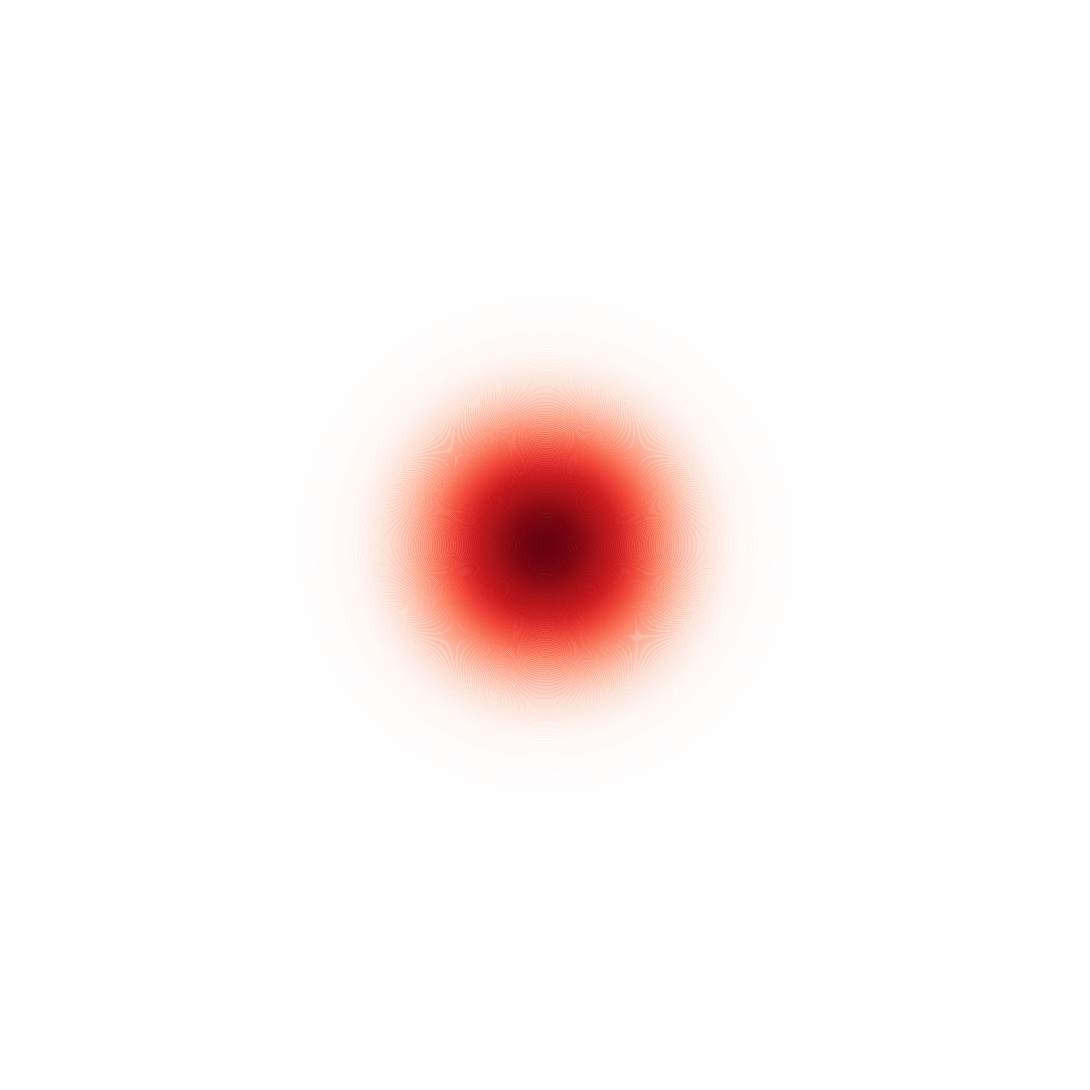

In [12]:
fig, ax = frameFigure(sim,1,-1,cmap="Reds_alpha")
fig.savefig("rnafixed.pdf",dpi=300)

In [7]:
m = sim.concentration_profile[1][-1,:]
c = sim.concentration_profile[0][-1,:]

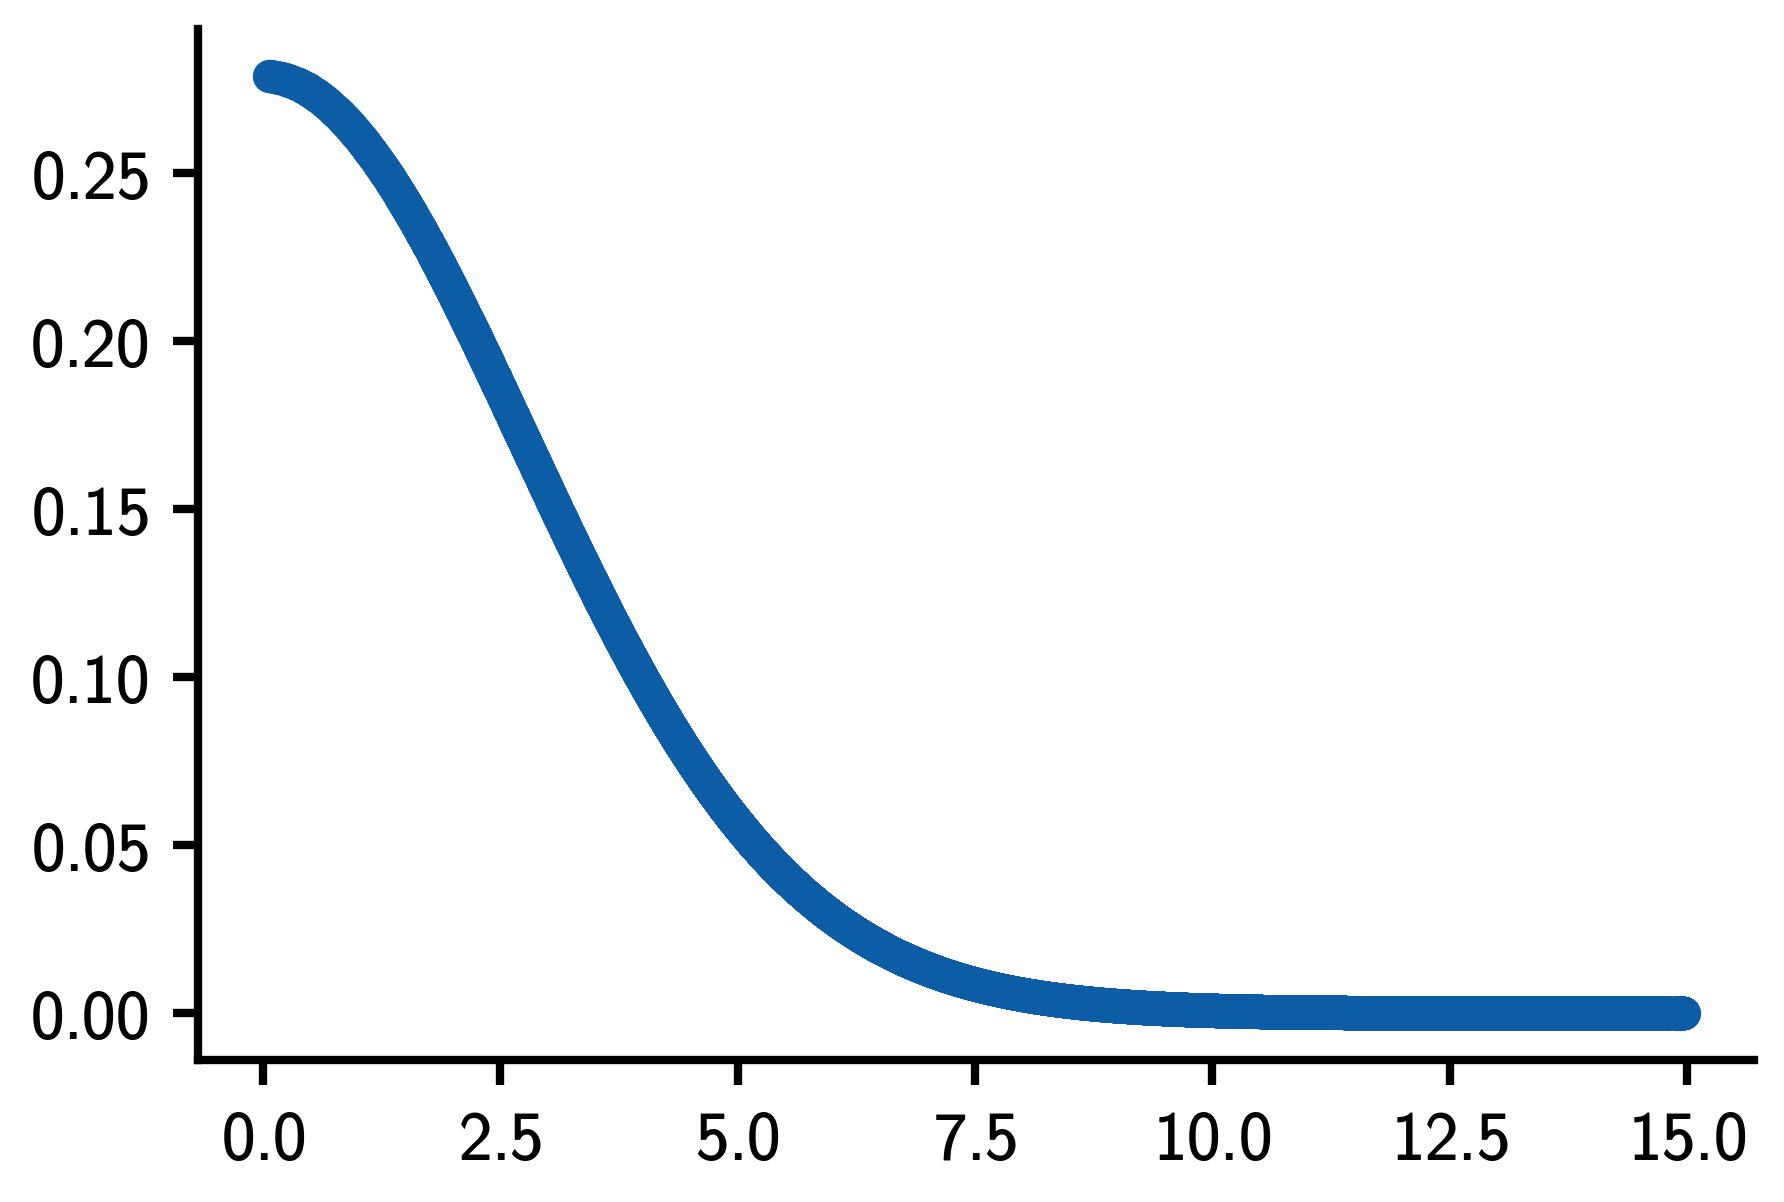

In [8]:
fig, ax = plt.subplots()
x = sim.xy[:,0]
y = sim.xy[:,1]
r = np.sqrt(x**2+y**2)
ax.scatter(r,m)

In [9]:
RNA = np.vstack([r,m]).T

In [10]:
np.savetxt("RNA.csv", RNA, delimiter=",")

In [11]:
c = sim.concentration_profile[0][-1,:]